In [ ]:
''' 
Лабораторная работа №2. Реализация метода главных компонент
1. Загрузить из наборов данных Scikit-learn набор dataset breast cancer wisconsin
(https://scikitlearn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) размерностью 30
2. Загрузить в отдельные переменные входные и выходные данные (data,target)
3. Реализовать метод главных компонент в функции, принимающей 2 аргумента: входные данные и искомое число главных компонент
K (рекомендуется визуализировать данные по мере возможности) — перед реализацией на Питоне рекомендую изучить пример на Экселе
(https://real-statistics.com/multivariate-statistics/factor-analysis/principal-component-analysis/)
    1. Нормализовать данные, вычитая для каждого значения в колонке среднее значения этой колонки (X.mean())
    2. Построить матрицу ковариации, используя метод NumPy cov()
    3. Диагонализировать матрицу методом NumPy linalg.eig()
    4. Отсортировать векторы, используя встроенный метод argsort()
    5. Используя синтаксис слайсинга, оставить K главных компонент
    6. Используя метод dot(), модифицировать исходные нормализованные данные
    7. Вернуть данные сниженной размерности
4. Загрузить те же данные во встроенную в Scikit-learn реализацию метода главных компонент (from sklearn.decomposition import PCA)
5. Сравнить результаты вашей реализации и готовой
6. Найти оптимальное число главных компонент методом локтя
'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA as sklearnPCA

In [2]:
# Загрузка набора данных
data = load_breast_cancer()
X = data.data
Y = data.target
K=3 #число главных компонент

# Вывод размера данных
print("Размерность входных данных:", X.shape)
print("Данные:", X)
print("Размерность выходных данных:", Y.shape)
print("Данные:", Y)

Размерность входных данных: (569, 30)
Данные: [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
Размерность выходных данных: (569,)
Данные: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1

In [3]:
# Своя реализация PCA
def pca(X, K):
    # 1. Нормализоция данных (центрирование)
    X_centered = X - np.mean(X, axis=0)
    # 2. Матрица ковариации
    covariance_matrix = np.cov(X_centered, rowvar=False)
    # 3. Диагонализирование матрицы
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # 4. Сортируем вектор по убыванию собственных значений
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    # 5. K главных компонент
    components = sorted_eigenvectors[:, :K]
    # 6. Модификация данных
    X_reduced = X_centered.dot(components)
    # Вычисление дисперсии
    explained_variance_custom = sorted_eigenvalues[:K] / sum(sorted_eigenvalues)
    return X_reduced, explained_variance_custom

X_reduced_custom, explained_variance_custom = pca(X, K)

In [4]:
# PCA из Scikit-learn
pca_sklearn_model = sklearnPCA(n_components=K)
X_reduced_sklearn = pca_sklearn_model.fit_transform(X)
# Вычисление дисперсии
explained_variance_sklearn = pca_sklearn_model.explained_variance_ratio_

In [5]:
print("Сравнение дисперсии:")
print("Доля объясненной дисперсии (Своя реализация PCA) для компонент: ", explained_variance_custom)
print("Доля объясненной дисперсии (PCA из Scikit-learn) для компонент: ", explained_variance_sklearn)
comparison_explained_variance = np.allclose(explained_variance_custom, explained_variance_sklearn)
print("Доли объяснённой дисперсии близки по значению? ", comparison_explained_variance)

print("Сравнение результатов:")
print("Результаты (Своя реализация PCA):\n", X_reduced_custom)
print("Результаты (PCA из Scikit-learn):\n", X_reduced_sklearn)
comparison_X_reduced = np.allclose(X_reduced_custom, X_reduced_sklearn)
print("Результаты близки по значению? ", comparison_X_reduced)

Сравнение дисперсии:
Доля объясненной дисперсии (Своя реализация PCA) для компонент:  [0.98204467 0.01617649 0.00155751]
Доля объясненной дисперсии (PCA из Scikit-learn) для компонент:  [0.98204467 0.01617649 0.00155751]
Доли объяснённой дисперсии близки по значению?  True
Сравнение результатов:
Результаты (Своя реализация PCA):
 [[1160.1425737  -293.91754364   48.57839763]
 [1269.12244319   15.63018184  -35.39453423]
 [ 995.79388896   39.15674324   -1.70975298]
 ...
 [ 314.50175618   47.55352518  -10.44240718]
 [1124.85811531   34.12922497  -19.74208742]
 [-771.52762188  -88.64310636   23.88903189]]
Результаты (PCA из Scikit-learn):
 [[1160.1425737  -293.91754364   48.57839763]
 [1269.12244319   15.63018184  -35.39453423]
 [ 995.79388896   39.15674324   -1.70975298]
 ...
 [ 314.50175618   47.55352518  -10.44240718]
 [1124.85811531   34.12922497  -19.74208742]
 [-771.52762188  -88.64310636   23.88903189]]
Результаты близки по значению?  True


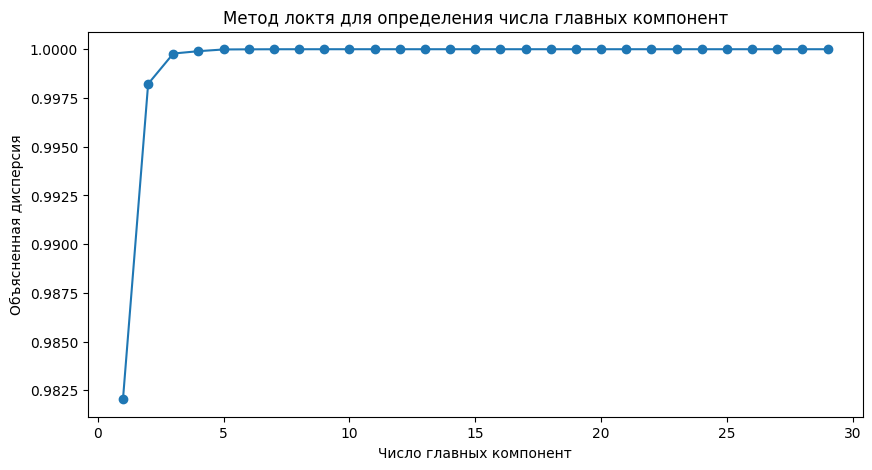

In [7]:
# Метод локтя
explained_variance = []
for k in range(1, 30):
    pca_elbow = sklearnPCA(n_components=k)
    X_reduced_elbow = pca_elbow.fit_transform(X)
    explained_variance.append(np.sum(pca_elbow.explained_variance_ratio_))

# Визуализация метода локтя
plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), explained_variance, marker='o')
plt.title('Метод локтя для определения числа главных компонент')
plt.xlabel('Число главных компонент')
plt.ylabel('Объясненная дисперсия')
plt.show()